In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr

In [6]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 54.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.2/113.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 6.2 MB/s eta 0:00:00


In [3]:
tata_moto = pdr.get_data_yahoo('TATAMOTORS.NS', start = '2020-03-01')
tata_moto

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02 00:00:00+05:30,133.000000,133.899994,123.800003,125.400002,125.400002,111585697
2020-03-03 00:00:00+05:30,127.500000,131.399994,125.250000,130.350006,130.350006,86765576
2020-03-04 00:00:00+05:30,129.600006,129.600006,120.550003,126.199997,126.199997,97546902
2020-03-05 00:00:00+05:30,127.550003,129.149994,124.250000,125.750000,125.750000,87795649
2020-03-06 00:00:00+05:30,115.000000,117.300003,112.800003,114.199997,114.199997,83971462
...,...,...,...,...,...,...
2023-01-19 00:00:00+05:30,406.500000,407.799988,400.100006,400.750000,400.750000,13126520
2023-01-20 00:00:00+05:30,404.000000,412.500000,401.200012,403.149994,403.149994,23906114
2023-01-23 00:00:00+05:30,407.000000,410.950012,405.000000,408.399994,408.399994,13113183


In [4]:
tata_moto.to_csv('TATA_Motors.csv')

In [5]:
stock_data = pd.read_csv('TATA_Motors.csv')
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-02 00:00:00+05:30,133.000000,133.899994,123.800003,125.400002,125.400002,111585697
1,2020-03-03 00:00:00+05:30,127.500000,131.399994,125.250000,130.350006,130.350006,86765576
2,2020-03-04 00:00:00+05:30,129.600006,129.600006,120.550003,126.199997,126.199997,97546902
3,2020-03-05 00:00:00+05:30,127.550003,129.149994,124.250000,125.750000,125.750000,87795649
4,2020-03-06 00:00:00+05:30,115.000000,117.300003,112.800003,114.199997,114.199997,83971462


In [6]:
# As we are performing UniVariate Time Series Analysis so we will conside only close price.
stock_data = stock_data[['Date', 'Close']]

In [7]:
stock_data.head()

,Date,Close
0,2020-03-02 00:00:00+05:30,125.400002
1,2020-03-03 00:00:00+05:30,130.350006
2,2020-03-04 00:00:00+05:30,126.199997
3,2020-03-05 00:00:00+05:30,125.750000
4,2020-03-06 00:00:00+05:30,114.199997


In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    723 non-null    object 
 1   Close   723 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.4+ KB


In [9]:
stock_data.Date = pd.to_datetime(stock_data.Date)
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype                                
---  ------  --------------  -----                                
 0   Date    723 non-null    datetime64[ns, pytz.FixedOffset(330)]
 1   Close   723 non-null    float64                              
dtypes: datetime64[ns, pytz.FixedOffset(330)](1), float64(1)
memory usage: 11.4 KB


In [10]:
stock_data = stock_data.set_index("Date")

In [11]:
stock_data['Close'].min()

65.30000305175781

In [12]:
stock_data[stock_data['Close'] == 65.30000305175781]

,Close
Date,
2020-04-03 00:00:00+05:30,65.300003


In [13]:
stock_data['Close'].max()

530.1500244140625

In [14]:
stock_data[stock_data['Close'] == 530.1500244140625]

,Close
Date,
2021-11-17 00:00:00+05:30,530.150024


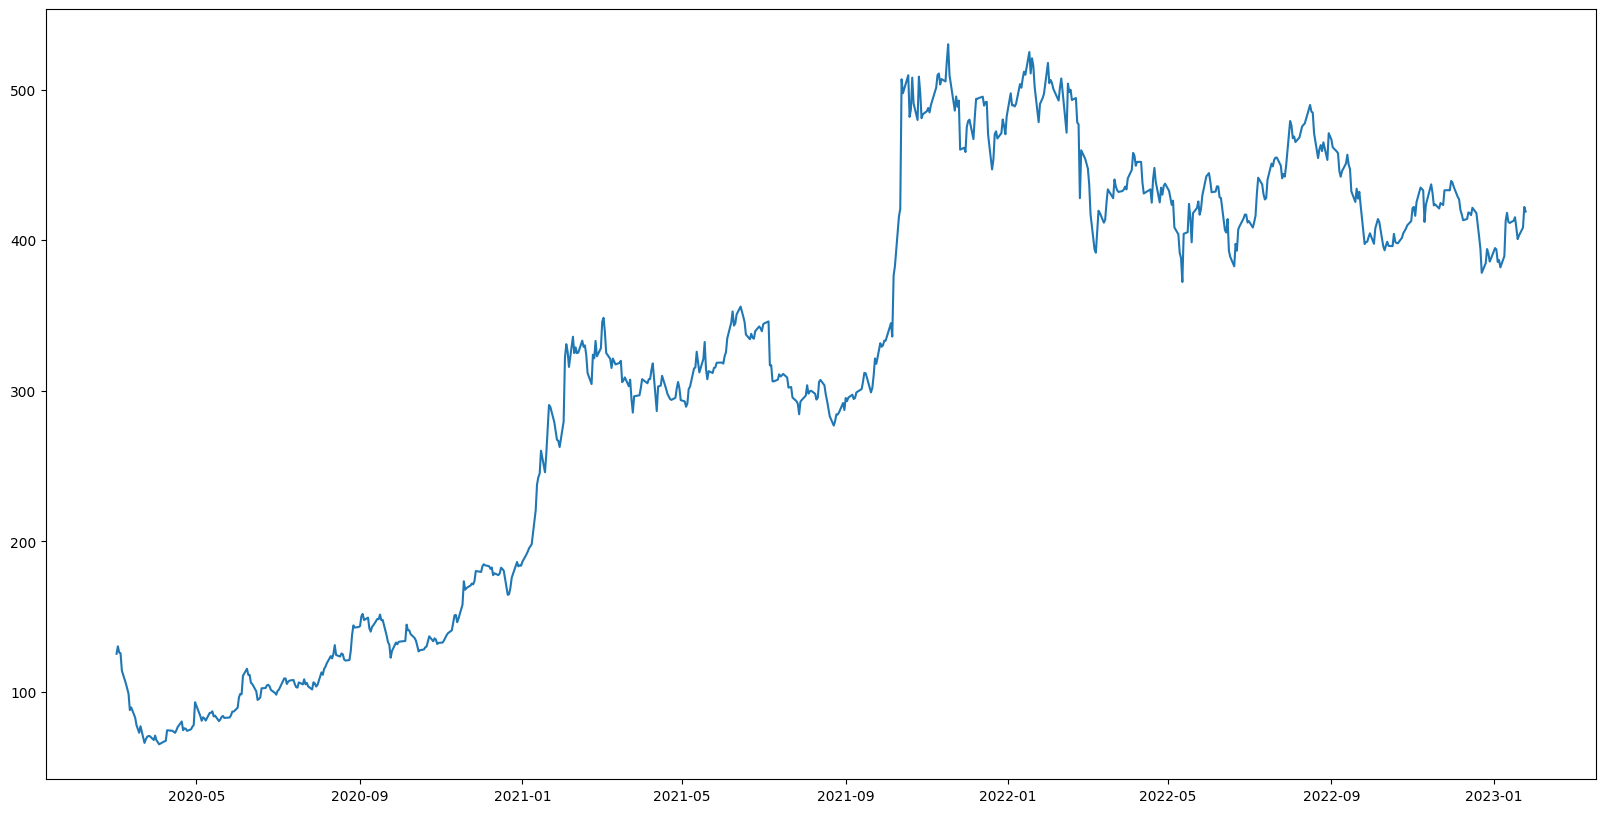

In [15]:
plt.figure(figsize = (20,10))
plt.plot(stock_data['Close'])

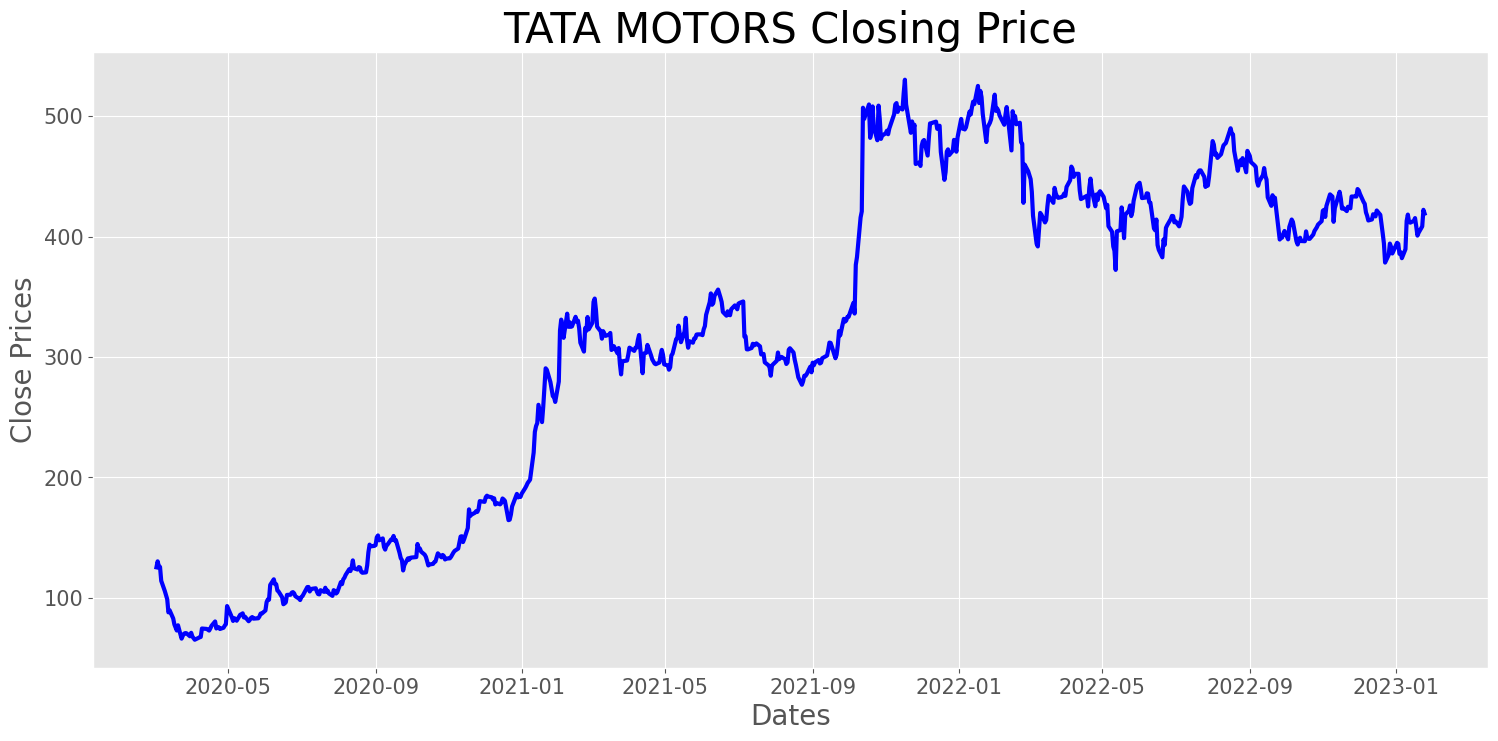

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(18, 8))
plt.grid(True)
plt.xlabel('Dates', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices', fontsize=20)
plt.yticks(fontsize=15)
plt.plot(stock_data['Close'], linewidth=3, color='blue')
plt.title('TATA MOTORS Closing Price', fontsize=30)
plt.show()

<AxesSubplot: xlabel='Close', ylabel='Density'>

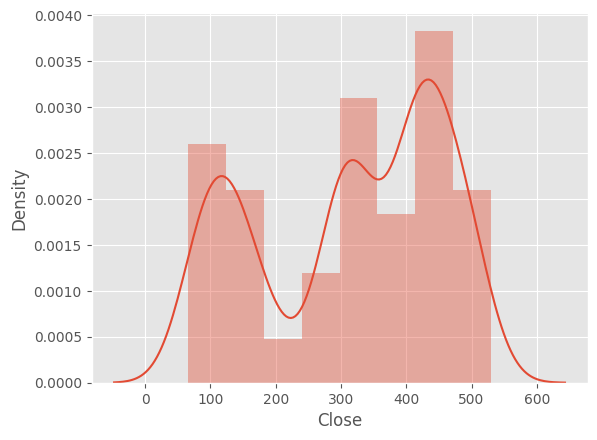

In [17]:
import seaborn as sns
sns.distplot(stock_data['Close'])

A probablity distribution can also be used to illustrate the data in our series

**ADF(Augmented Dickey Fuller TEST)**
to test Series is stationary or not. NULL Hypothesis: if the series has unit root Alt. Hypothesis: if the there is no unit root in the series. Series is non stationary if null hypothesis

In [18]:
stock_data

,Close
Date,
2020-03-02 00:00:00+05:30,125.400002
2020-03-03 00:00:00+05:30,130.350006
2020-03-04 00:00:00+05:30,126.199997
2020-03-05 00:00:00+05:30,125.750000
2020-03-06 00:00:00+05:30,114.199997
...,...
2023-01-19 00:00:00+05:30,400.750000
2023-01-20 00:00:00+05:30,403.149994
2023-01-23 00:00:00+05:30,408.399994


In [19]:
# mean of the 'Close' column data for 1st 12 days

np.mean(stock_data['Close'].head(12))

103.3874994913737

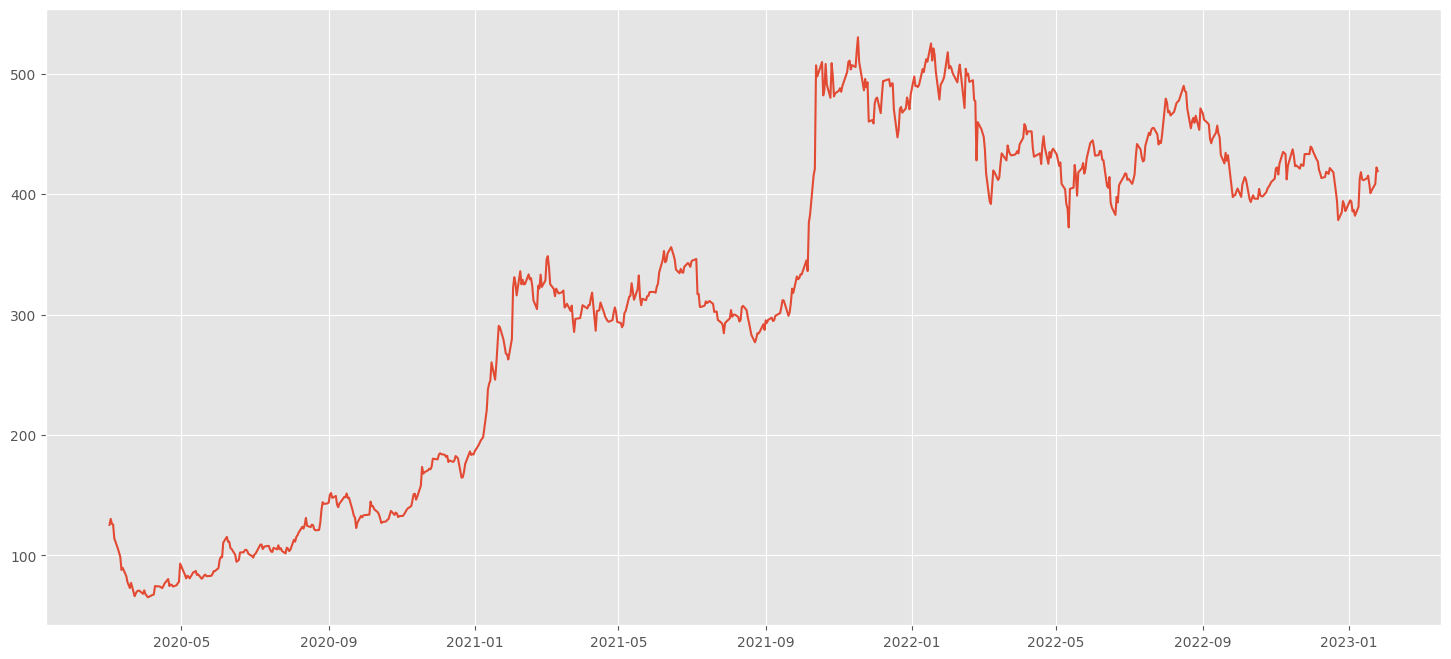

In [20]:
plt.figure(figsize=(18, 8))
plt.plot(stock_data['Close'])

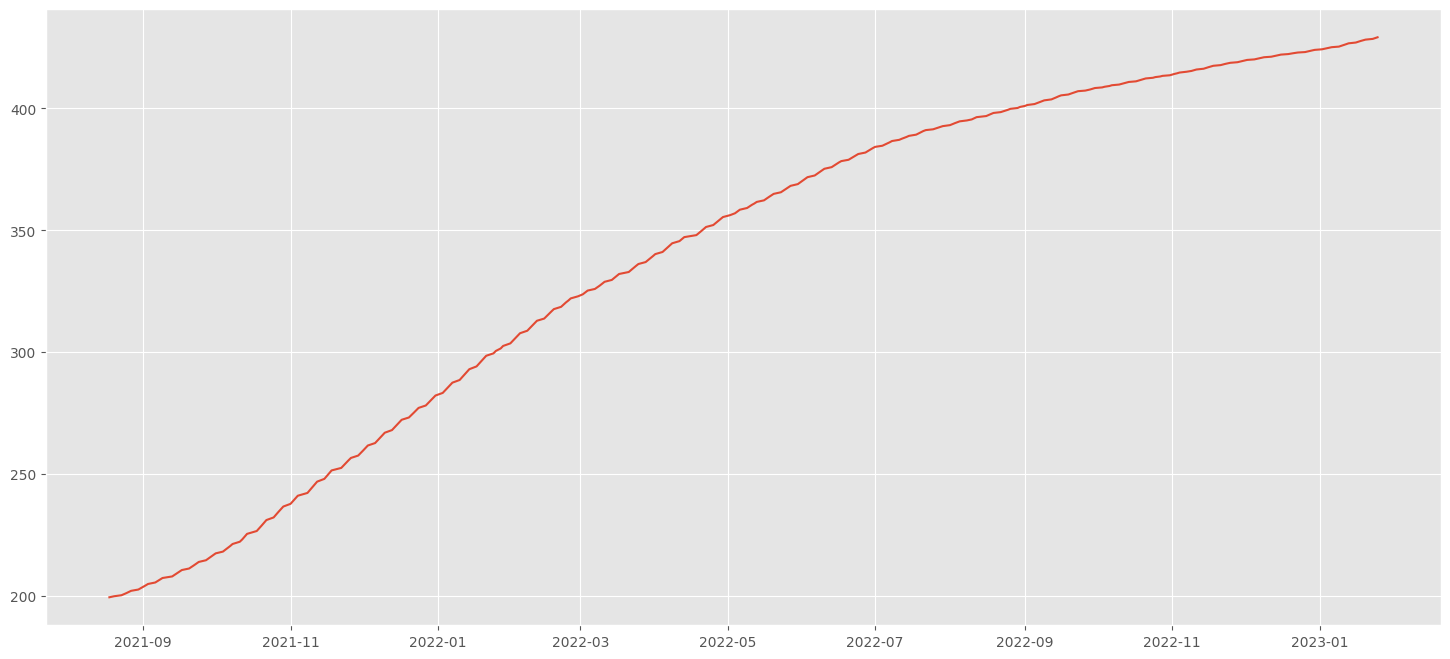

In [21]:
# Plotting mean where 'Window' = 365 (SMA)
plt.figure(figsize=(18, 8))
plt.plot(stock_data['Close'].rolling(365).mean())

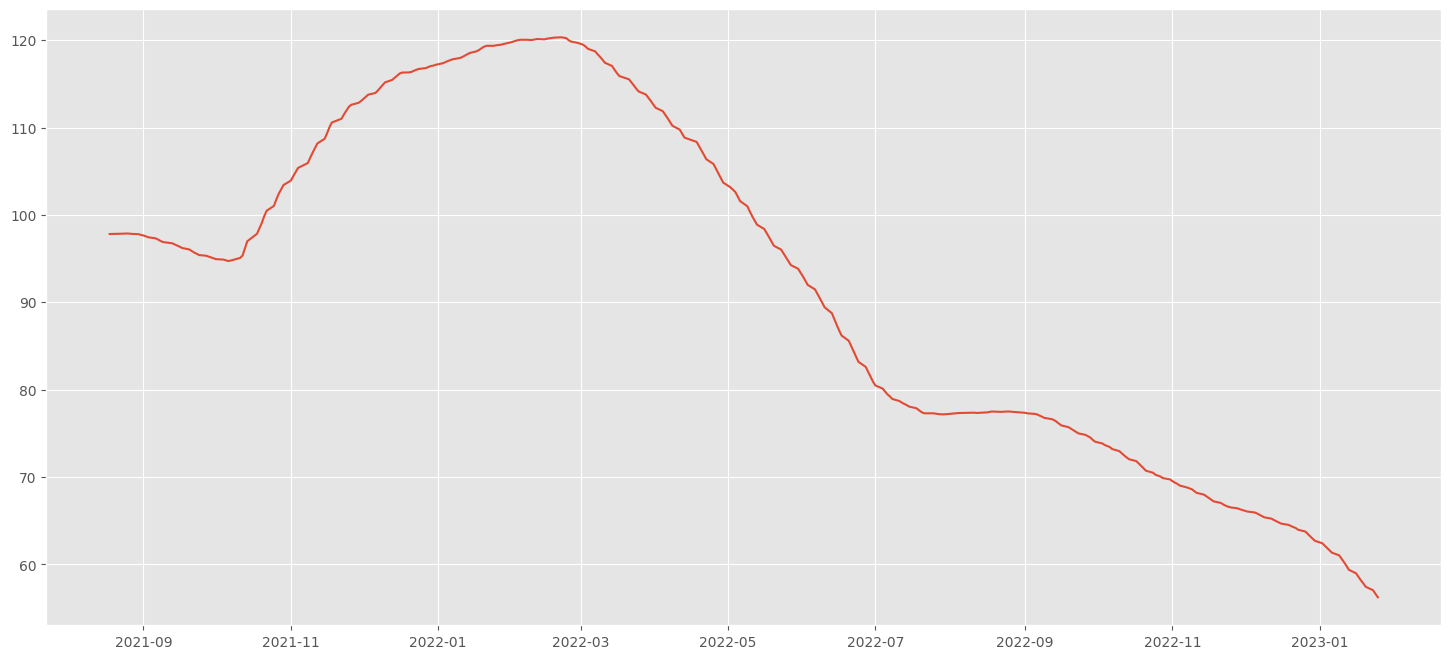

In [22]:
# Plotting Standard Deviation where window = 365 
plt.figure(figsize=(18, 8))
plt.plot(stock_data['Close'].rolling(365).std())

In [23]:
# Adafuller test of the data to check stationary
# Adafuller test is a statistical significance test which means the test will give results in hypothesis tests with null and alternative h

adfuller(stock_data['Close'], autolag='AIC')

(-1.3041614366886782,
 0.6272663072507965,
 4,
 718,
 {'1%': -3.439490435810785,
  '5%': -2.8655738086413374,
  '10%': -2.568918067209286},
 5115.793229005145)

In [24]:
rolmean = stock_data.rolling(12).mean()
rolstd = stock_data.rolling(12).std()

In [25]:
# Function to Test for stationarity

def test_stationarity(timeseries):
  # Determining rolling statistics
  rolmean = rolmean = stock_data.rolling(12).mean() # Rolling mean
  rolstd = stock_data.rolling(12).std() ## Rolling Standard Deviation

  # Plot rolling statistics
  plt.figure(figsize=(18,8))
  plt.grid('both')
  plt.plot(timeseries, color='blue', label='Original', linewidth=3)
  plt.plot(rolmean, color='red', label='Rolling Mean', linewidth=3)
  plt.plot(rolstd, color='black', label='Rolling Std', linewidth=4)
  plt.legend(loc='best', fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')
  plt.title('Rolling Mean and Standard Deviation', fontsize=25)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.show(block=False)

  print("Results of dickey fuller test")
  adft = adfuller(timeseries, autolag='AIC')
  # output for dft give us without defining what the values are.
  # hence we manually write what values does it explains using a for loop

  output = pd.Series(adft[0:4], index=['Test Statistics', 'p-value', 'No. of lags used', 'Number of observation used'])
  for key, values in adft[4].items():
    output['critical value (%s)'%key] = values
  print(output)



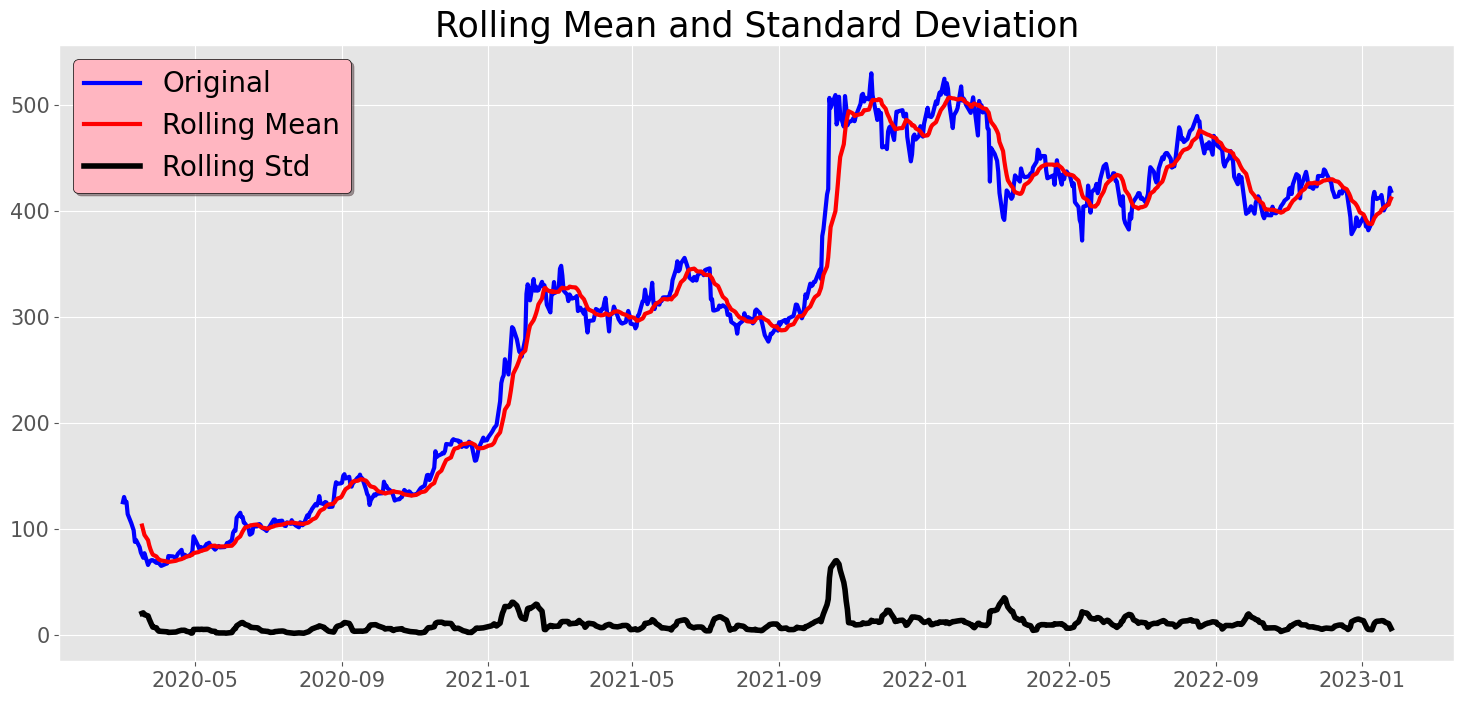

Results of dickey fuller test
Test Statistics                -1.304161
p-value                         0.627266
No. of lags used                4.000000
Number of observation used    718.000000
critical value (1%)            -3.439490
critical value (5%)            -2.865574
critical value (10%)           -2.568918
dtype: float64


In [26]:
test_stationarity(stock_data['Close'])

*We can't reject the null hypothesis because the p-value is bigger than 0.05. Futhermore, the test statistics exceed the critical values. As a result, the data is not stationary. Differencing is a method of transforming a non-stationary time series into a stationary one. This is an important step in preparing data to be used in an ARIMA model. So, to make the data stationary, we need to take the first-order difference of the data. substract today's close price from yesterday's close price.*

In [27]:
df_close = stock_data['Close']
df_close

Date
2020-03-02 00:00:00+05:30    125.400002
2020-03-03 00:00:00+05:30    130.350006
2020-03-04 00:00:00+05:30    126.199997
2020-03-05 00:00:00+05:30    125.750000
2020-03-06 00:00:00+05:30    114.199997
                                ...    
2023-01-19 00:00:00+05:30    400.750000
2023-01-20 00:00:00+05:30    403.149994
2023-01-23 00:00:00+05:30    408.399994
2023-01-24 00:00:00+05:30    422.149994
2023-01-25 00:00:00+05:30    419.049988
Name: Close, Length: 723, dtype: float64

In [28]:
df_close.diff()

Date
2020-03-02 00:00:00+05:30          NaN
2020-03-03 00:00:00+05:30     4.950005
2020-03-04 00:00:00+05:30    -4.150009
2020-03-05 00:00:00+05:30    -0.449997
2020-03-06 00:00:00+05:30   -11.550003
                               ...    
2023-01-19 00:00:00+05:30    -7.649994
2023-01-20 00:00:00+05:30     2.399994
2023-01-23 00:00:00+05:30     5.250000
2023-01-24 00:00:00+05:30    13.750000
2023-01-25 00:00:00+05:30    -3.100006
Name: Close, Length: 723, dtype: float64

In [29]:
tata_moto_close_diff_1 = df_close.diff()

In [30]:
tata_moto_close_diff_1.isna().sum()

1

In [31]:
tata_moto_close_diff_1.dropna(inplace=True)

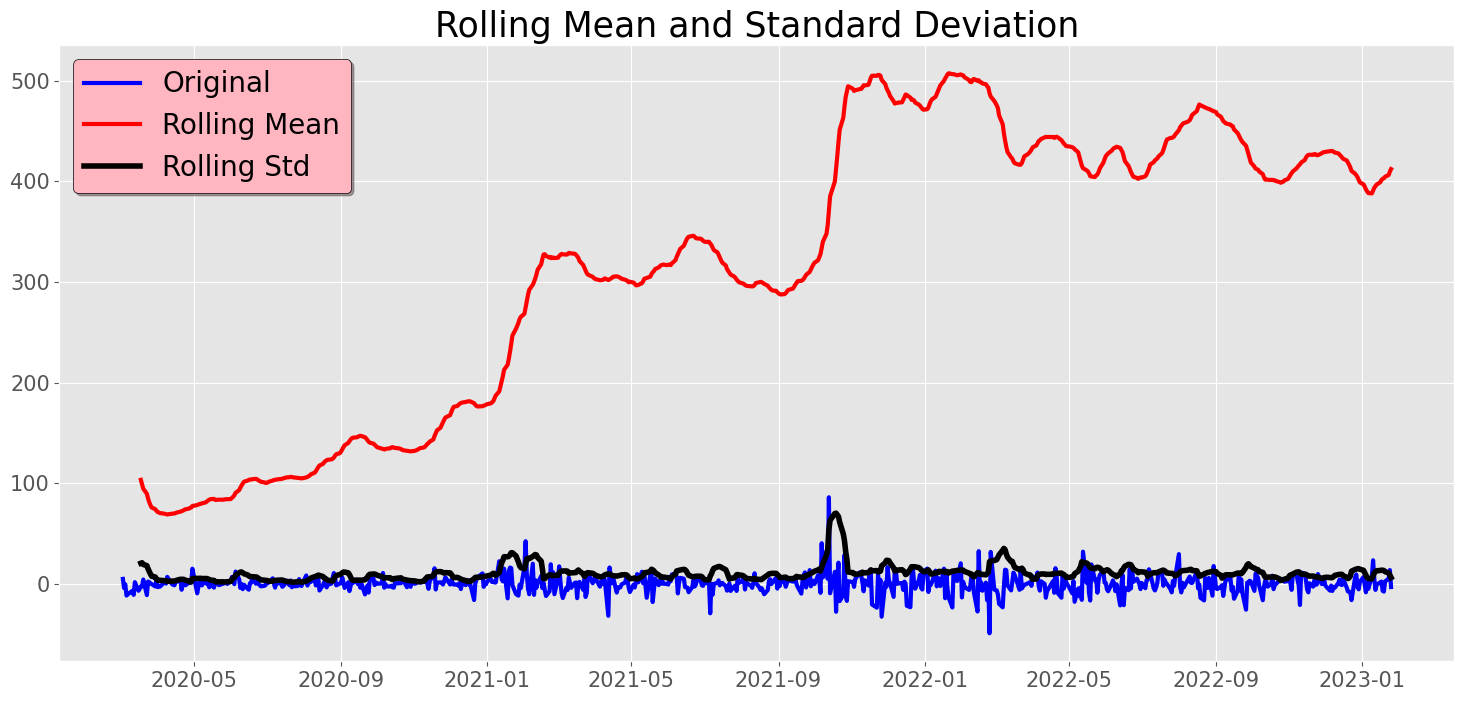

Results of dickey fuller test
Test Statistics              -1.311138e+01
p-value                       1.632160e-24
No. of lags used              3.000000e+00
Number of observation used    7.180000e+02
critical value (1%)          -3.439490e+00
critical value (5%)          -2.865574e+00
critical value (10%)         -2.568918e+00
dtype: float64


In [32]:
# Plot the tata motor Adj Close 1st order difference
test_stationarity(tata_moto_close_diff_1)

p-value is near to zero which defines stationary data

we will try to check the trend in the data

breakdown
season cycle
error as well
test statistics: -13.03410

The p-value is obtained is less than significance level of 0.05 and the ADF statistics is also lower than any critical values

We can reject the null hypothesis. So, the time series is in fact stationary

Decompose the time series: To start, we want to decompose the data to seperate the seasonality, trend and residual, since we have 3 years of stock data. We would expect there's a yearly and weekly pattern.

In [33]:
result = seasonal_decompose(stock_data[['Close']], period=30) # no of days 

<Figure size 2000x1000 with 0 Axes>

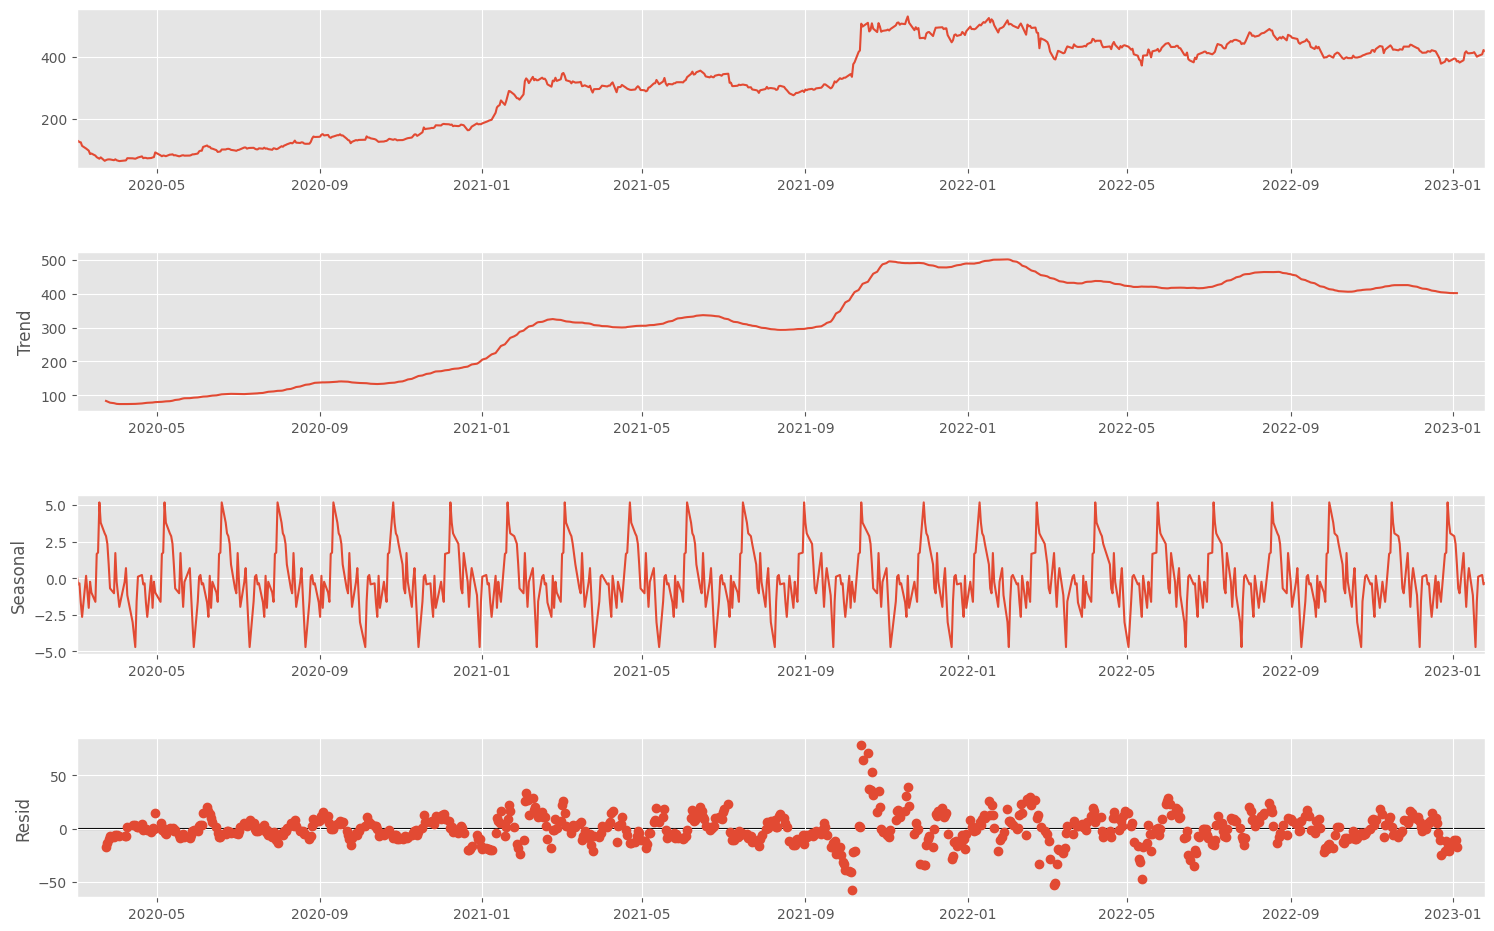

In [34]:
# Plottinng Trend, cycle, season, error -->> additive model
fig = plt.figure(figsize=(20,10))
fig = result.plot()
fig.set_size_inches(17,10)

<Figure size 2000x1000 with 0 Axes>

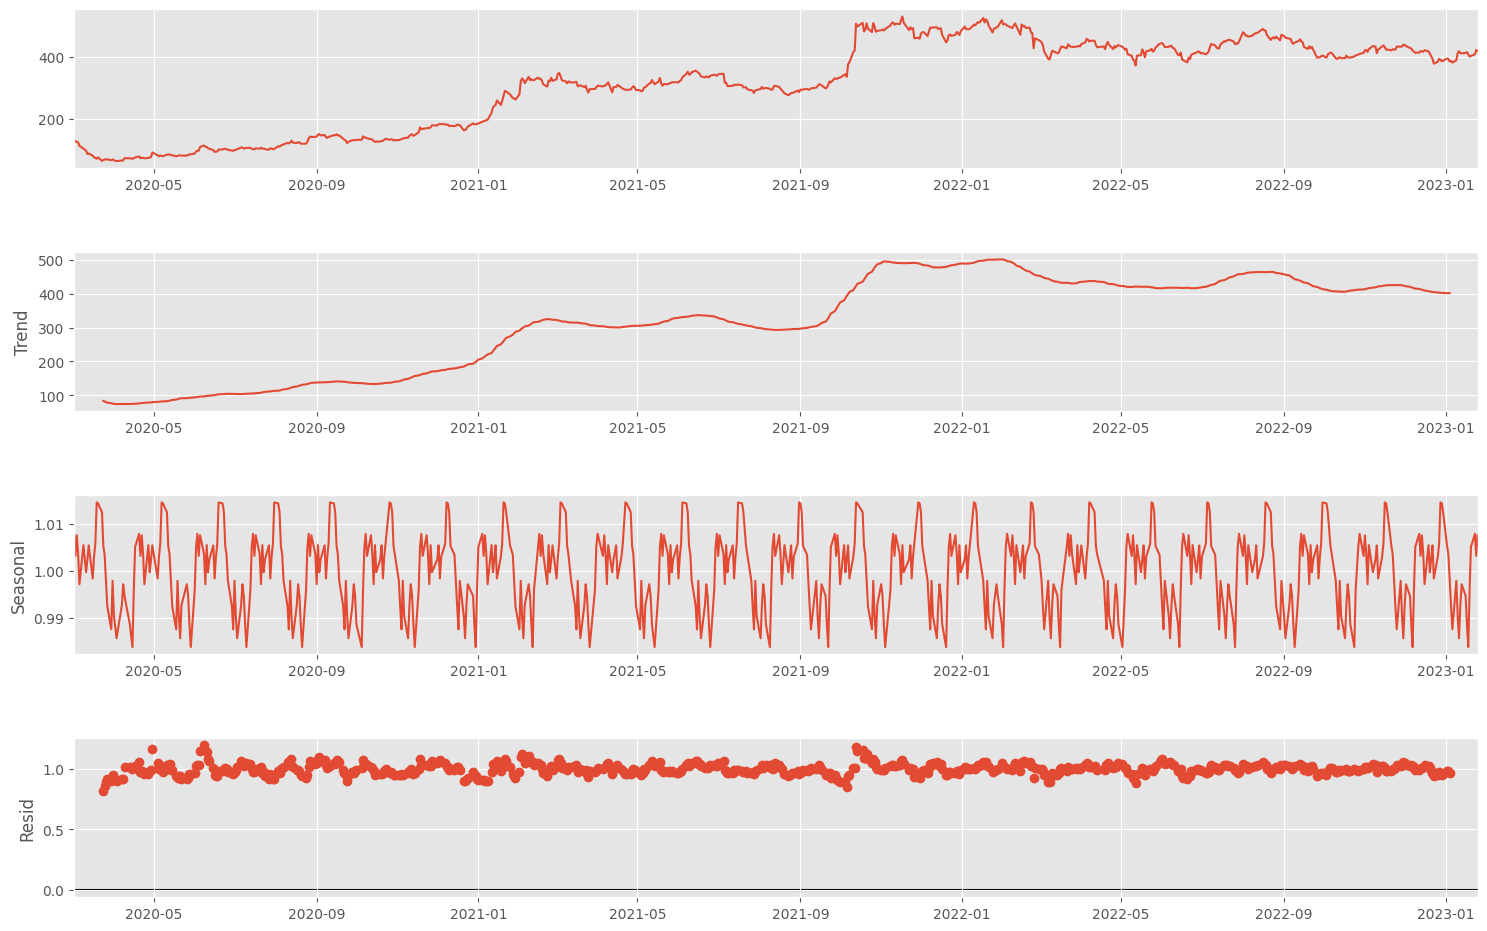

In [35]:
result = seasonal_decompose(stock_data[['Close']], period=30, model='multiplicative') # no of days 
# Plottinng Trend, cycle, season, error -->> additive model
fig = plt.figure(figsize=(20,10))
fig = result.plot()
fig.set_size_inches(17,10)

Now we'll create an ARIMA model and train it using train data's stock closing price. 

In [36]:
# preparing training data, where prediction will be after every 60 records
train_data = df_close[0:-60]

In [37]:
# preparing test data
test_data = df_close[-60:]

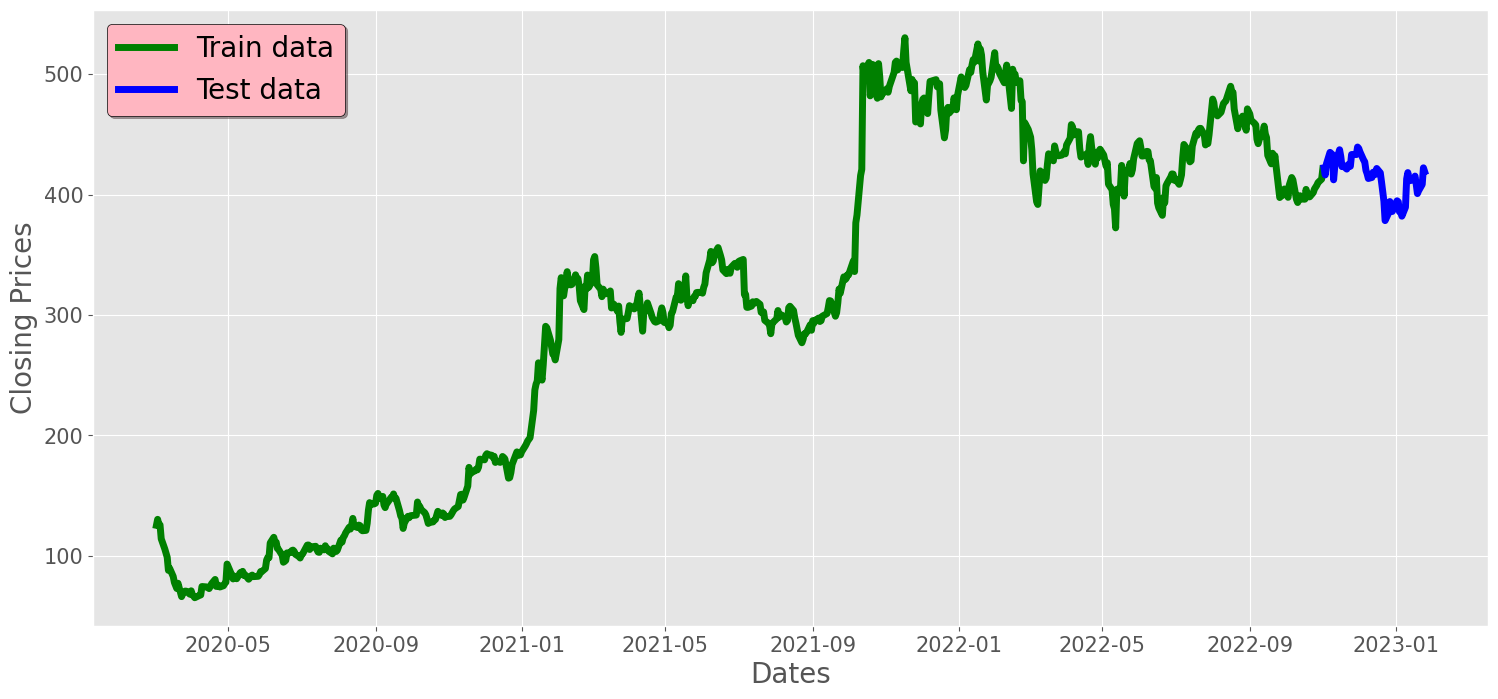

In [38]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Closing Prices', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(train_data, 'green', label='Train data', linewidth=5)
plt.plot(test_data, 'blue', label='Test data', linewidth=5)
plt.legend(fontsize = 20, shadow=True, facecolor='lightpink', edgecolor='k')